In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Advertising.csv')

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 5)

In [9]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [13]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [15]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [19]:
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns

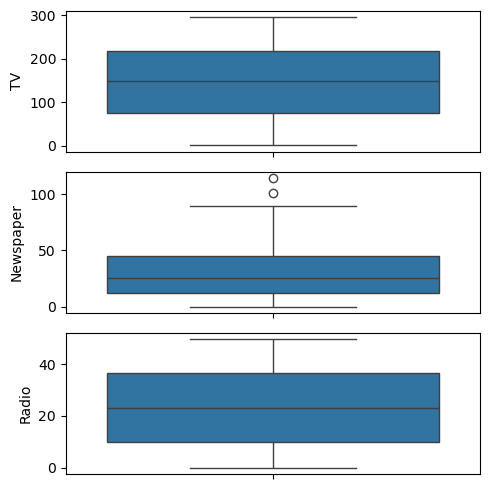

In [23]:
fig, axs = plt.subplots(3,figsize =(5,5))
plt1 = sns.boxplot(df['TV'],ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'],ax = axs[1])
plt3 = sns.boxplot(df['Radio'],ax = axs[2])
plt.tight_layout()


<Axes: xlabel='Newspaper', ylabel='Density'>

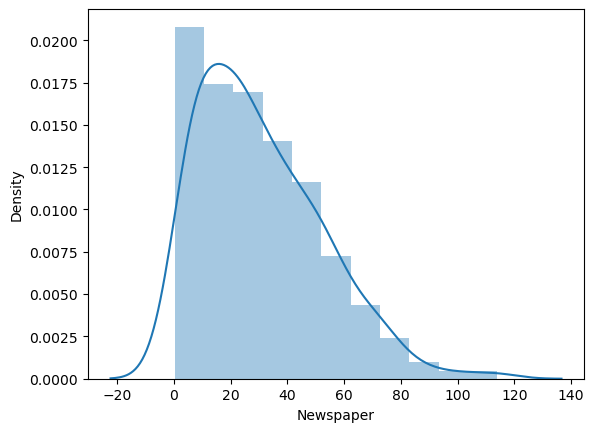

In [25]:
sns.distplot(df['Newspaper'])

In [27]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [29]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [31]:
data = df.copy()

In [33]:
data.loc[data['Newspaper']>93, 'Newspaper']=93


<Axes: ylabel='Newspaper'>

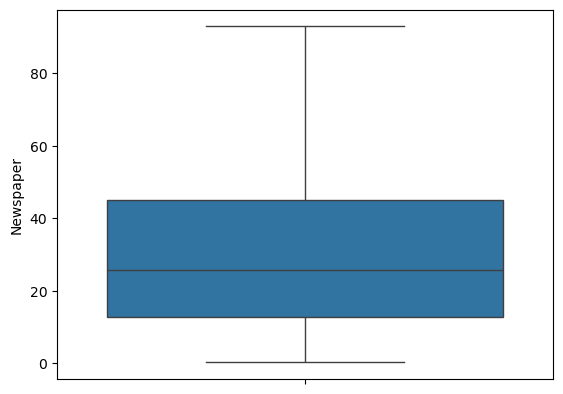

In [35]:
sns.boxplot(data['Newspaper'])

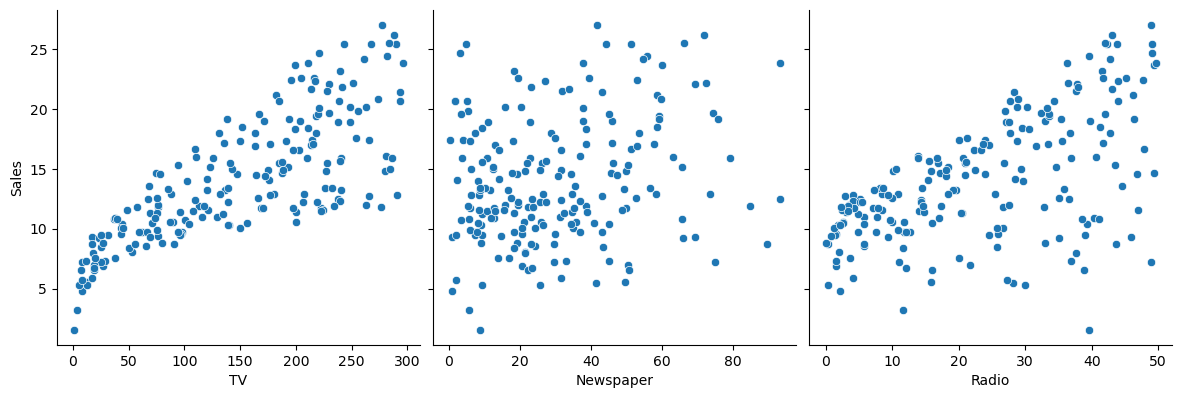

In [39]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], 
             y_vars='Sales', height=4, aspect=1, kind='scatter')

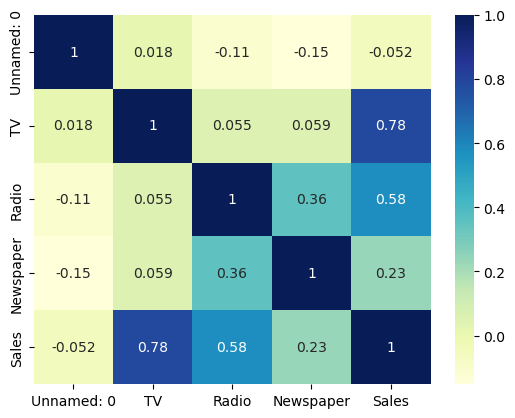

In [43]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [49]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales'] > 0.5) | (df.corr()['Sales'] < -0.5)].index)

In [53]:
print(important_features)

['TV', 'Radio', 'Sales']


In [55]:
x = data['TV']
y = data['Sales']

In [57]:
x = x.values.reshape(-1,1)

In [59]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [61]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [63]:
print(x.shape,y.shape)

(200, 1) (200,)


In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [69]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [73]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [75]:
knn = KNeighborsRegressor().fit(x_train,y_train)
knn


KNeighborsRegressor()

In [77]:
knn_train_pred = knn.predict(x_train)

In [79]:
knn_test_pred = knn.predict(x_test)

In [81]:
print(knn_train_pred,knn_test_pred)

[22.42  7.38 14.5   8.26 11.08 11.7  16.64 15.94 14.98 16.64 14.44 17.42
 15.4  19.9   7.38 14.02 12.16 16.26 11.76 16.26 10.86 17.54 10.34 17.3
  6.18 16.98 22.42 17.54 18.7  14.28 14.5  10.68 16.06 14.44 17.2   9.98
 16.32 14.44 20.14  9.98 10.68 16.06 15.5  16.06  7.38 17.46 21.36 16.84
 16.9  14.02 14.5   8.26 15.04 20.38 17.58  6.18  4.1  11.1  17.3  17.46
 20.14 19.9  16.06 17.46 18.7  16.06 14.12 16.64 16.52 10.34 14.28 14.42
 17.02 17.86 14.88 20.7  16.66 11.26 11.76 11.1  14.02 15.38  8.26 11.3
 20.78 17.86 14.12  4.1  10.18 17.6  16.74 17.54 21.52  8.26 20.7  10.34
 16.52 22.54 11.1  17.3  11.44 17.58 11.1  18.5  17.46 12.16 15.92 14.6
 16.84  7.38 10.68 11.76 14.28 16.74 10.34 18.9  10.34  4.1  14.02 16.64
 14.74 14.08 14.12 18.74  7.38 17.46 18.36 21.36 14.12  8.26 16.66 18.36
 16.74 20.7 ] [15.04 16.28 22.42  6.18 16.32 11.76 17.86 10.32 15.4  15.5   8.98  9.98
 15.2   4.1  14.08 15.94  4.1  16.14 11.76 15.92 17.46 11.3  10.34 20.38
 11.3  10.32 18.74 14.08 12.16  4.1  17.

In [83]:
results = pd.DataFrame(columns=['Model','Train R2','Test R2','Test RMSE','Variance'])

In [89]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
results = pd.concat([results, pd.DataFrame([{"Model":"K-Nearest Neighbors","Train R2": r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance}])], ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5953865376430356
RMSE: 3.2315096387686273


In [91]:
results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.660386,0.595387,3.23151,0.064999


In [93]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [95]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [97]:
print(svr_train_pred,svr_test_pred)

[17.50030314  8.46604121 13.78894078  8.61235016 12.00044357 10.9408581
 16.21144248 15.77445333 13.34181349 16.9063452  14.22508593 16.08192447
 17.24748196 17.6290409   8.4414462  13.06789211 11.43555408 16.30852466
 10.69973199 16.38232193 11.22626017 17.8101059   9.04971611 17.80663063
  8.38926543 16.3996715  17.43668097 17.81133096 17.0497774  14.55944578
 13.65472732  9.81493345 17.60439904 14.14496672 15.9249566  11.83090346
 17.20088609 14.0946376  17.77906097 11.77801143 10.22813496 17.59156281
 15.72186482 17.60439904  8.45258991 17.42066603 17.68033732 15.53975597
 16.58159995 13.20510826 13.6236248   8.6        15.20167726 17.7209942
 16.69099447  8.38821675  8.34716637 11.65654978 17.80993237 17.38251078
 17.76754465 17.65086966 17.59962532 17.37600973 17.06870551 17.60122189
 12.37234709 16.18953333 16.82656389  9.18423291 14.64613238 13.97309244
 15.99456436 17.1833507  14.88717545 17.75995449 16.76886017 10.26758332
 10.74567597 11.7515834  13.05203146 17.32712228  8.6

In [103]:
r2 = r2_score(y_test, svr_test_pred)
r2_train = r2_score(y_train, svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test, svr_test_pred))
variance = r2_train - r2

# Replace append with concat
results = pd.concat([results, pd.DataFrame([{"Model": "Support Vector Machine", 
                                             "Train R2": r2_train, 
                                             "Test R2": r2, 
                                             "Test RMSE": rmse, 
                                             "Variance": variance}])], ignore_index=True)

print("R2:", r2)
print("RMSE:", rmse)

R2: 0.615197620437566
RMSE: 3.1514046090596377


In [105]:
results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.660386,0.595387,3.231510,0.064999
1,Support Vector Machine,0.550217,0.615198,3.151405,-0.064981


In [107]:
import statsmodels.api as sm

In [109]:
x_train_constant = sm.add_constant(x_train)

In [111]:
model = sm.OLS(y_train,x_train_constant).fit()

In [113]:
model.params

const    7.066583
x1       0.048225
dtype: float64

In [115]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     189.5
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           2.73e-27
Time:                        06:02:13   Log-Likelihood:                -350.43
No. Observations:                 134   AIC:                             704.9
Df Residuals:                     132   BIC:                             710.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0666      0.619     11.409      0.0

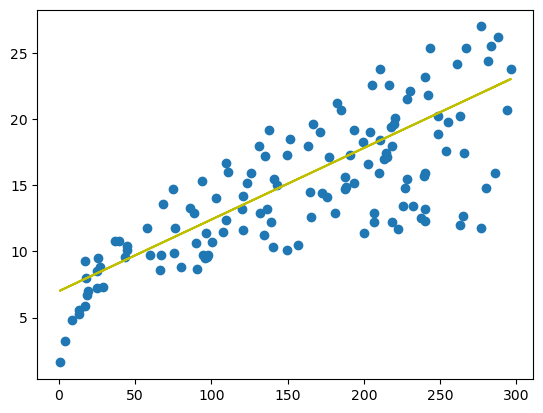

In [117]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955 + 0.0541 * x_train, 'y')
plt.show()

In [119]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

42    -0.525299
189   -1.268381
90    -2.343135
136    1.198870
51    -1.208324
         ...   
106   -1.072195
14     2.090794
92     1.834941
179   -2.452562
102   -5.779091
Name: Sales, Length: 134, dtype: float64

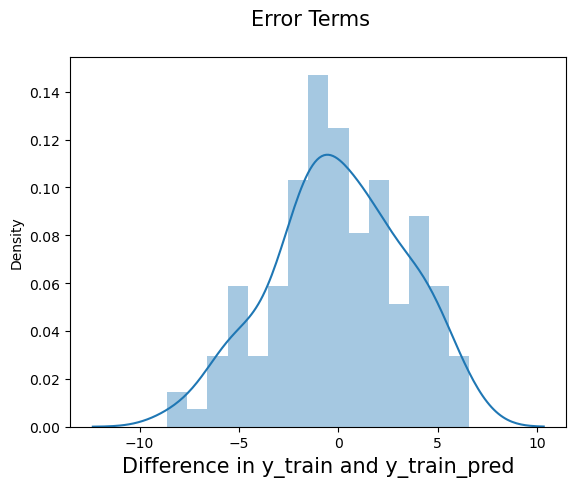

In [121]:
fig = plt.figure()
sns.distplot(res,bins =15)
fig.suptitle('Error Terms', fontsize =15)
plt.xlabel("Difference in y_train and y_train_pred",fontsize = 15)
plt.show()

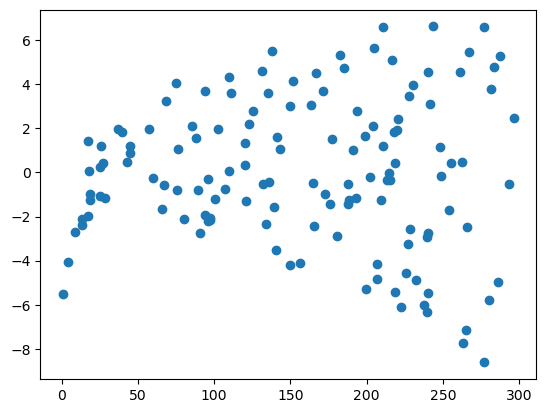

In [123]:
plt.scatter(x_train,res)
plt.show()

In [125]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [127]:
y_pred

array([14.94164546, 16.48965233, 21.19154233,  7.63080932, 17.69044269,
       10.68824343, 17.5216569 ,  9.47780816, 17.79171417, 15.51069472,
        8.58565468,  9.77680014, 18.37523078,  7.32699489, 13.79390206,
       15.2743946 ,  7.41862147, 16.59574625, 10.69788834, 18.51508186,
       18.13410821, 10.33620449,  8.89911401, 19.16611279, 10.39407391,
        9.64659396, 17.36251601, 13.78425716, 11.27176004,  7.47166843,
       16.70184018, 10.40371881, 16.65843812,  7.88157679, 20.60320327,
       18.55366147,  9.39582649, 20.26563168, 12.71849542,  8.39275662,
       12.66062601, 15.60232129,  9.14505902, 10.07096967, 17.86887339,
        8.90875891, 10.47123313, 14.17005326, 12.11086656, 10.74611285,
       10.83773942, 15.18759048,  7.48613578,  7.44273372, 10.7509353 ,
       13.30683448, 10.60626176, 21.03722388,  8.01178297, 16.59574625,
       20.77681152, 15.98329494, 12.51113002,  8.21432593, 21.0854484 ,
        8.00213807])

In [129]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [131]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.116441466981447

In [133]:
r2 = r2_score(y_test,y_pred)
r2

0.6236886078089201

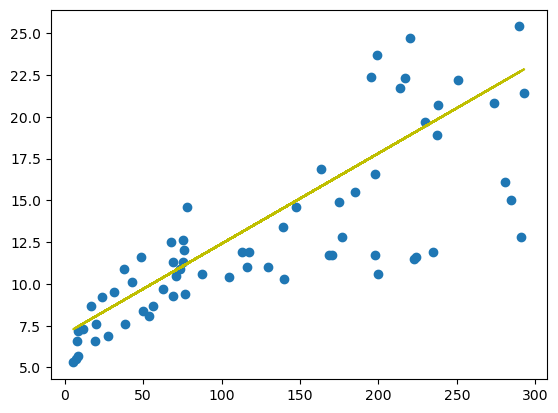

In [135]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955 + 0.0541 *x_test ,'y')